### Plotting velocity of center of mass as a function of time

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import sys
import time as t
sys.path.append('..')

from IRSMicroLensing import OrbitCalc_dv
from IRSMicroLensing import CelestialBodyData as cb

In [ ]:
t_span = 2*(86400*365)
dt = t_span / 2e5

bodies = np.array([
    [0, 0, 0, 0, 0, 0, cb.sun['mass'], -1],
    [cb.mercury['a']*cb.AU2KM, cb.mercury['e'], 0, 0, 0, 0, cb.mercury['mass'], 0],
    [cb.venus['a']*cb.AU2KM, cb.venus['e'], 0, 0, 0, 0, cb.venus['mass'], 0],
    [cb.earth['a']*cb.AU2KM, cb.earth['e'], 0, 0, 0, 0, cb.earth['mass'], 0],
    [cb.moon['a'], cb.moon['e'], 0, 0, 0, 0, cb.moon['mass'], 1],
    [cb.mars['a']*cb.AU2KM, cb.mars['e'], 0, 0, 0, 0, cb.mars['mass'], 0],
    [cb.jupiter['a']*cb.AU2KM, cb.jupiter['e'], 0, 0, 0, 0, cb.jupiter['mass'], 0]
])

plotter = OrbitCalc_dv.OrbitPropagator(bodies=bodies, dt=dt, t_span=t_span, anim=False)


PROPAGATING ORBIT...


  3%|▎         | 5204/199999 [00:05<03:14, 999.96it/s] 


KeyboardInterrupt: 

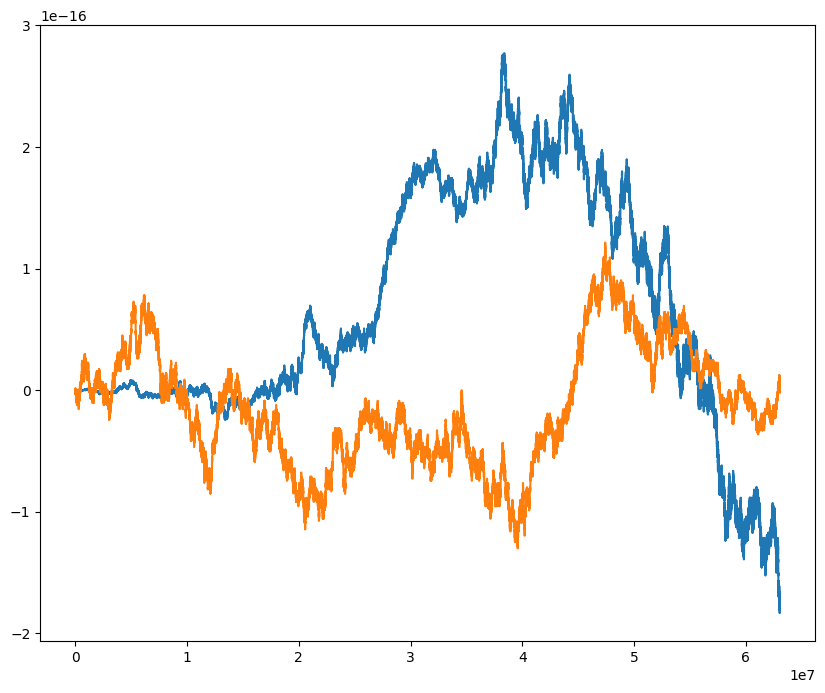

In [55]:
states = plotter.states
masses = np.matrix(plotter.mass)

velocities = states[:, :, 3:]
CM_velocity = np.zeros((plotter.steps, 3), dtype=np.float64)

for step, velocity in enumerate(velocities):
    CM_velocity[step, :] = np.sum(np.multiply(masses.transpose(), velocity), 0) / np.sum(masses)

CM_acceleration = np.zeros((plotter.steps, 3), dtype=np.float64)

for step in range(1, plotter.steps - 1):
    CM_acceleration[step, :] = (CM_velocity[step + 1] - CM_velocity[step - 1]) / (2 * plotter.dt)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()

ax.plot(plotter.ets, CM_velocity[:, 0] - CM_velocity[0, 0])
ax.plot(plotter.ets, CM_velocity[:, 1] - CM_velocity[0, 1])

# ax.plot(plotter.ets, CM_acceleration[:, 0])
# ax.plot(plotter.ets, CM_acceleration[:, 1])

plt.show()

### Testing different methods of integration to make orbit code more accurate

In [138]:
import scipy.integrate as integrate

def test_func(t, state: np.ndarray):
    M = np.array([[0, 1], [-1, 0.5*(1 - state[0]**2)]])

    statedot = np.dot(M, state.transpose())

    return statedot

t0 = 0
y0 = np.array([1, 1])

integrator = integrate.DOP853(test_func, t0, y0, t_bound=50, rtol=1e-20, atol=1e-20)

time_points = [t0]
states = [y0]

while integrator.status == 'running':
    integrator.step()
    time_points.append(integrator.t)
    states.append(integrator.y)

times = np.array(time_points)
states = np.array(states)

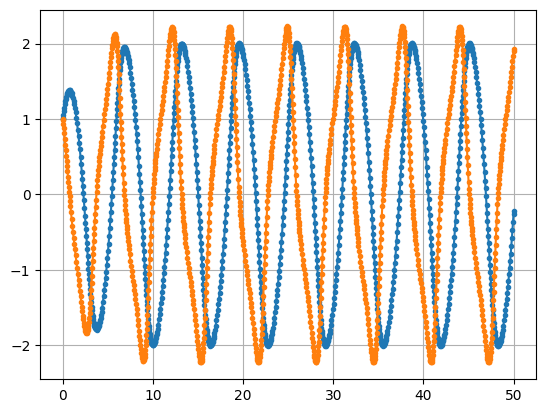

In [139]:
fig = plt.figure()
ax = fig.add_subplot()

# ax.plot(states[:, 0], states[:, 1], marker='.')
ax.plot(times, states[:, 0], marker='.')
ax.plot(times, states[:, 1], marker='.')

ax.grid()

plt.show()